In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
#Dataset Used in Lab - Buys Computer
comp = pd.read_csv("LAB1.csv")
comp

,age,income,student,credit rating,buys computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [4]:
comp.loc[comp['income'] == 'high', 'income'] = 3
comp.loc[comp['income'] == 'medium', 'income'] = 2
comp.loc[comp['income'] == 'low', 'income'] = 1
comp.loc[comp['student'] == 'no', 'student'] = 1
comp.loc[comp['student'] == 'yes', 'student'] = 2
comp.loc[comp['credit rating'] == 'fair', 'credit rating'] = 1
comp.loc[comp['credit rating'] == 'excellent', 'credit rating'] = 2
comp.loc[comp['age'] == '<=30', 'age'] = 1
comp.loc[comp['age'] == '31...40', 'age'] = 2
comp.loc[comp['age'] == '>40', 'age'] = 3

In [5]:
comp['income'][1] = 3

In [6]:
comp

,age,income,student,credit rating,buys computer
0,1,3,1,1,no
1,1,3,1,2,no
2,2,3,1,1,yes
3,3,2,1,1,yes
4,3,1,2,1,yes
5,3,1,2,2,no
6,2,1,2,2,yes
7,1,2,1,1,no
8,1,1,2,1,yes
9,3,2,2,1,yes


In [7]:
all_inputs = comp[['age','income','student','credit rating']].values
all_classes = comp['buys computer'].values
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.5, random_state=1)

/Users/vishhvaksrinivasan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
print('Accuracy =',dtc.score(test_inputs, test_classes))

Accuracy = 0.8571428571428571


In [9]:
print(test_classes)

['yes' 'no' 'yes' 'yes' 'yes' 'yes' 'no']


In [10]:
print(dtc.predict(test_inputs))

['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no']


In [11]:
res = dtc.predict(test_inputs)
t = test_classes
for i in range(0,len(res)):
    if res[i]!=t[i]:
        res[i]=0
print('Number of Errors = %d' % (np.count_nonzero(res == 0)))

Number of Errors = 1


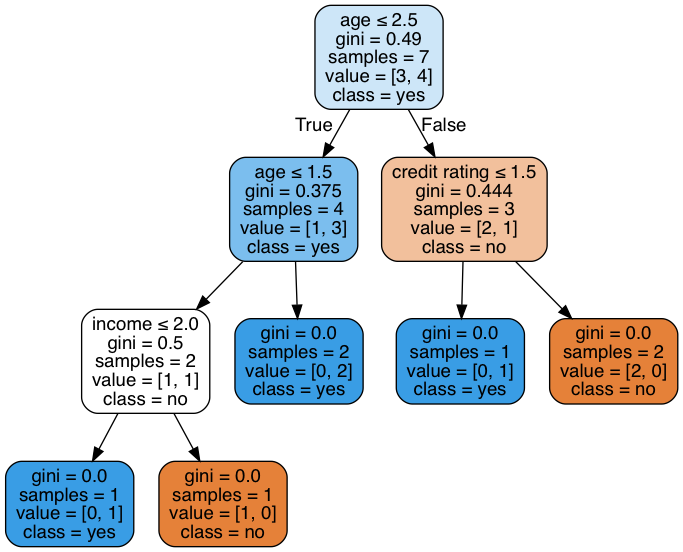

In [12]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,
                feature_names=comp.columns[0:4],
                class_names = dtc.classes_.astype(str),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [13]:
#Redoing above with own Dataset - List of Pokemnon from Generations 1-6 with attributes)
pkmn = pd.read_csv("Pokemon.csv")

In [14]:
pkmn

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [15]:
pkmn.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [16]:
pkmn.columns = ['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Nature']

In [17]:
pkmn.loc[pkmn['Nature'] == False, 'Nature'] = 'Baseline'

In [18]:
pkmn.loc[pkmn['Nature'] == True, 'Nature'] = 'Legendary'

In [19]:
pkmn

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Nature
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,Baseline
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,Baseline
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,Baseline
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,Baseline
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,Baseline
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,Baseline
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,Baseline
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,Baseline
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,Baseline
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,Baseline


In [20]:
pkmn.isna().any()

#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Nature        False
dtype: bool

In [21]:
pkmn.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Nature        object
dtype: object

In [22]:
pkmn.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [23]:
all_inputs = pkmn[['Total', 'HP', 'Attack', 'Defense','Sp. Atk','Sp. Def','Speed']].values
all_classes = pkmn['Nature'].values
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

/Users/vishhvaksrinivasan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
print(test_inputs.shape)
print(train_inputs.shape)

(240, 7)
(560, 7)


In [25]:
dtc = DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
print('Accuracy =',dtc.score(test_inputs, test_classes))

Accuracy = 0.9333333333333333


In [27]:
print(test_classes)

['Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Legendary' 'Legendary' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Legendary' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Legendary' 'Baseline' 'Baseline'
 'Legendary' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Legendary' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Legendary'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'

In [28]:
print(len(test_classes))

240


In [29]:
print(dtc.predict(test_inputs))

['Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Legendary' 'Legendary' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Legendary' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Legendary' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Legendary' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Legendary'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Legendary' 'Baseline'
 'Baseline' 'Baseline' 'Baseline' 'Baseline' 'Baseline'

In [30]:
res = dtc.predict(test_inputs)
t = test_classes
for i in range(0,len(res)):
    if res[i]!=t[i]:
        res[i]=0
print('Number of Errors = %d' % (np.count_nonzero(res == 0)))

Number of Errors = 16


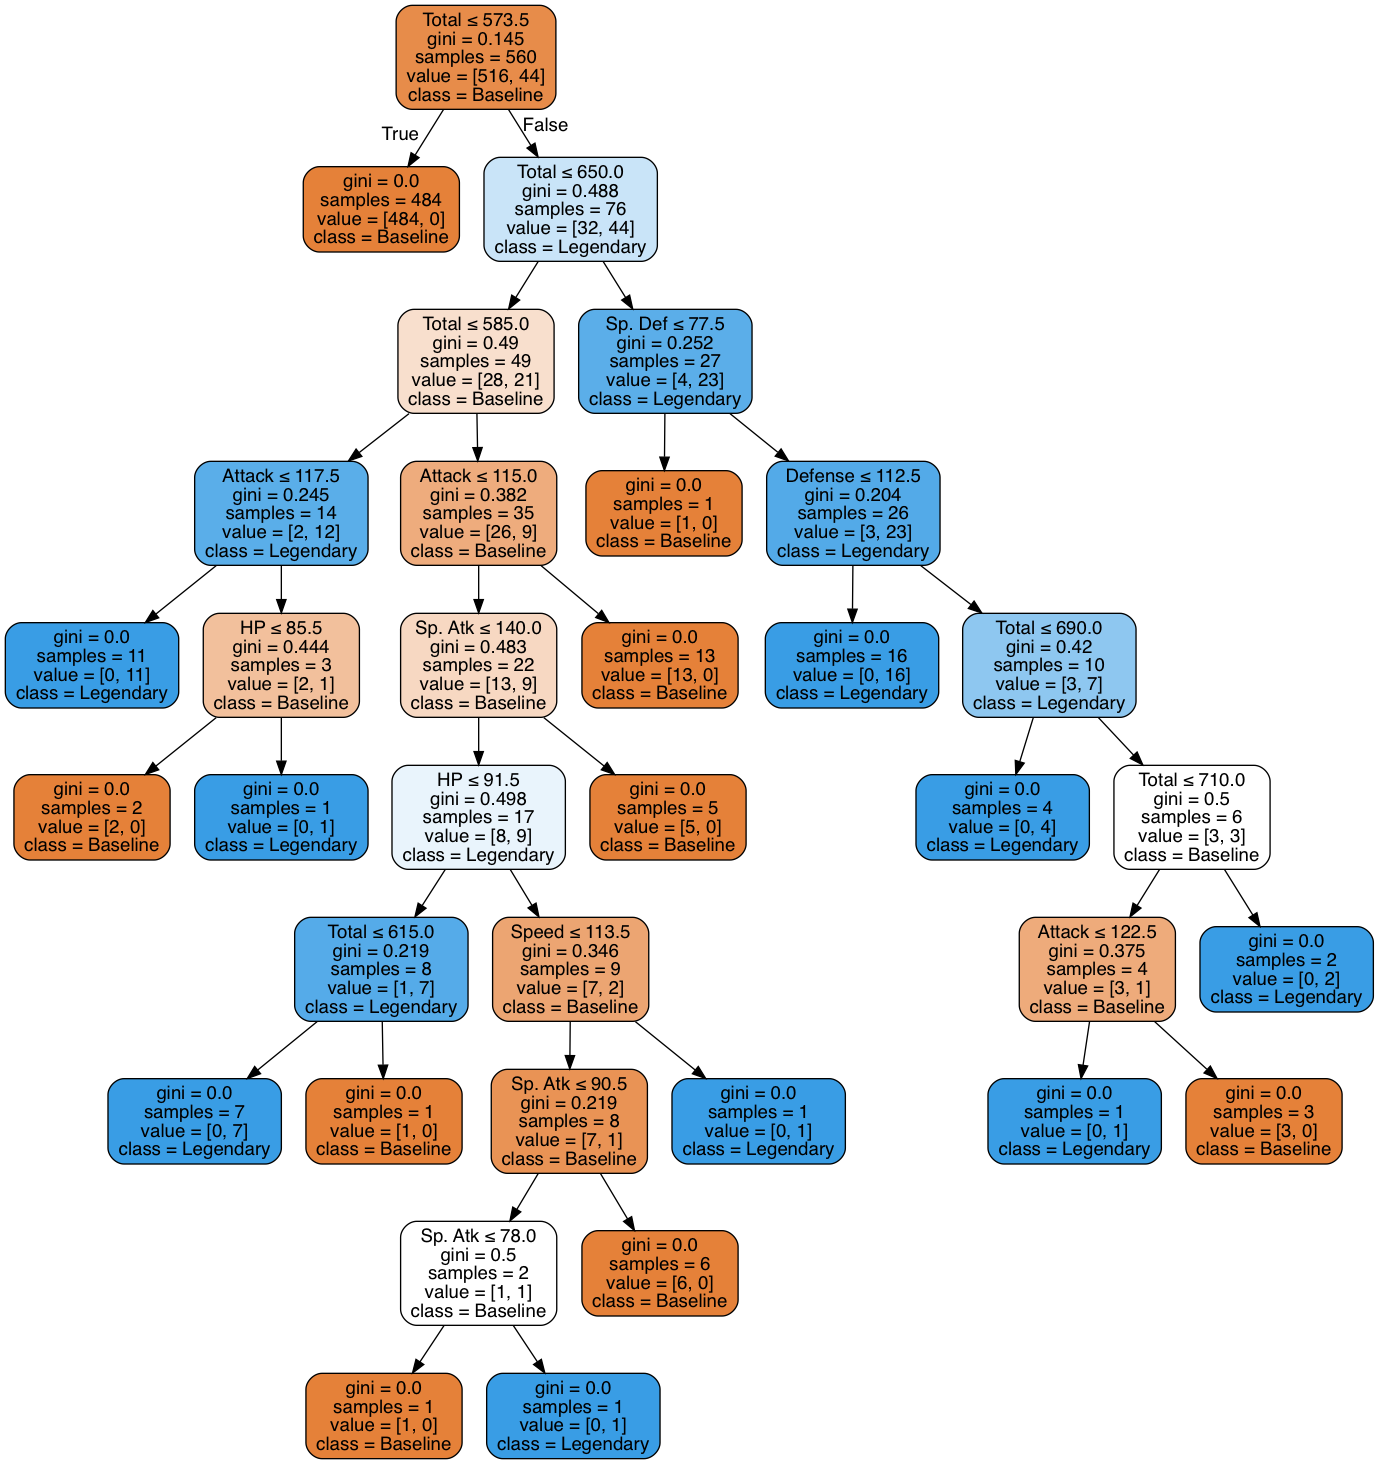

In [31]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
inputs=['Total', 'HP', 'Attack', 'Defense','Sp. Atk','Sp. Def','Speed']
target=['Legendary']
export_graphviz(dtc, out_file=dot_data,
                feature_names=pkmn.columns[4:11],
                class_names = dtc.classes_.astype(str),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())